# BMI Lab 1: Neuron Firing Rate Predictions

### EE 16B: Designing Information Devices and Systems II, Spring 2016 

**Name 1**:

**Login**: ee16b-


**Name 2**:

**Login**: ee16b-

# Table of Contents

* [Instructions](#instructions)
* [Lab Policies](#policies)
* [Introduction](#intro)
* [Task 1: Data preparation](#task1)
* [Task 2: Predicting joint angle from firing rates](#task2)

<a id='instructions'></a>
#Instructions
* Complete this lab by filling in all of the required sections, marked with `"YOUR CODE HERE"` or `"YOUR COMMENTS HERE"`.


* When you finish notify your GSI to get get checked off for this lab. Be ready to answer a few questions to show your understanding of each section.


* Labs will be graded based on completion for teams of 2 students.



<a id='policies'></a>
# Lab Policies
* YOU MUST ATTEND THE LAB SECTION YOU ARE ENROLLED IN. If you anticipate missing a section please notify your GSI in advance.

* You are required to return all parts checked out at the beginning of the lab section unless told otherwise.

* ** Food and drinks are not allowed in the lab.**

* **Clean up, turn off all equipment, and log off of computers before leaving.**

<a id='introduction'></a>
# Introduction
Welcome to the first lab of EE16B! This is the first of a series of 3 labs in the BMI module in which you will deconstruct and analyze brain signals. In this lab series, we will be using a simulated time domain signal of a subject whose brain waves were recorded while moving a cursor around on a computer screen.

For this week's lab, we will examine the subject's neuron firing rates (i.e., the rate at which the neurons gain enough charge to release a fast pulse, or a "spike"). Specifically, we get timestamps of neuron spikes for 153 neurons and we want to use this information to predict the angle of the subject's arm.

<a id='task1'></a>
##<span style="color:blue"> Task 1: Data preparation</span>

We have some spike timestamps of simulated brain waves of a subject whose arm is pointing in certain directions over time. The physical property we are trying to predict is the joint angle $\theta$. In the diagram below, the subject's arm is pointing towards a point $(x,y)$ in the screen (the ellipse) and $\theta$ is the angle between the subject's arm and the "default position" when the arm extends to $(0,0)$ in the screen. The data we get, however, is in terms of the $(x,y)$ coordinates in the screen so we have to convert those into angles before we can use it to train and predict.


<img style="width:350px" src="http://inst.eecs.berkeley.edu/~ee16b/fa15/lab_pics/joint-angle.png">


Note that the arm is in 3 dimensional space, so the point labeled (x,y) in the picture actually has coordinates of (x,y,0) and the point labeled "joint" has coordinates of (0,0,1).

In [4]:
%matplotlib inline
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import math

spike_times = {k: v[0] for k, v in scipy.io.loadmat('spike_times').items() if k.startswith('sig')}
_names = sorted(spike_times.keys())
spike_times = [spike_times[_name] for _name in _names]
pos = [v for k,v in scipy.io.loadmat('hand_kin').items() if k.startswith('hand_kin')][0]

Our kinematics data (`(x,y)` positions) is sampled at 1kHz (`fs`). This means that every millisecond, we have a position measurement. To train our model and predict, we want to divide our whole time frame into windows of 100 samples (`window_len`), which corresponds to 0.1 seconds (`window_size`). We will then use 10 (`past_use`) of these 0.1 second windows to predict the angle of the joint at the last window. We need to use some past data because there is some delay between the neuron spikes and the arm movement. In other words, the neurons spike first before the arm actually moves --- thought precedes action. 

In [5]:
fs = 1000
window_len = 100
window_size = window_len/fs # window size in seconds
past_use = 10 # number of past window_len windows of spike data to use to predict the joint angle in the last window

Plot the matrix `pos`, which contains the $(x,y)$ coordinates data of the point in the screen.

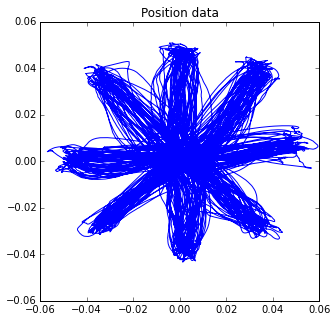

In [6]:
plt.figure(figsize=(5,5))
plt.plot(*pos.T)
plt.title('Position data')

We need to take the average of the position data using non-overlapping windows of `window_len` samples. Since we have to use `past_use` windows to predict the next window, we can only start training at window (`past_use-1`). Also, we need to make sure that we only return valid windows to use for training (i.e. start at window `past_use-1`).

In [7]:
def average_positions(pos_data, window_len, past_use):
    """ Calculates the average position in windows of time. Here N is the number of windows
    and L is the number of samples per window.
    Parameters:
        pos_data: Position data (shape: (NL) x 2)
        window_len: Length of window in samples (L)
        past_use: The number of time windows to use to predict angle in the next time window
    Returns:
        Average positions within valid time windows for training (shape: (N-past_use+1) x 2) 
    """
    avg_pos = np.mean(pos_data.reshape((-1, window_len, 2)), axis=1)[past_use - 1:, :]
    return avg_pos

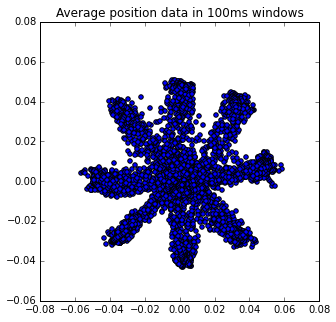

In [8]:
# Try plotting the average positions

avg_pos = average_positions(pos, window_len, past_use)
plt.figure(figsize=(5,5))
plt.scatter(*avg_pos.T)
plt.title('Average position data in 100ms windows')

Compute the angles $\theta$ from the `avg_pos` data <b>assuming the joint is `1` unit away from the screen</b>. The function `np.arctan2` and `np.linalg.norm` might be useful here. When you call `np.linalg.norm`, you can specify the dimension of the matrix to call norm on using the `axis` argument. `np.arctan2` is needed to return an angle in 4 quadrants instead of 2. Consult the angle diagram for a visualizaton. After you find the angles, plot the angles as a histogram to verify your code. The plot should look similar to the one below. The subject spends most of its time in the center of the screen or in one of the edges of the star-shaped trace.

<center>
<img width="400px" src="http://inst.eecs.berkeley.edu/~ee16b/fa15/lab_pics/bmi-angles.png">
</center>

In [ ]:
# Compute the joint angle from avg_pos

# YOUR CODE HERE #
angles = 

plt.hist(angles)

The last thing to set up for the model training and prediction is to divide up the spike times into windows of time. Complete the function below to count the number of spikes that happen in each time window of `window_size`.

In [ ]:
def spike_bins(spike_times, window_size, num_windows):
    """ Divides up the spikes into bins; rounds down timestamps to the nearest bin
    Parameters:
        spike_times: List of arrays of timestamps (in seconds); each array corresponds to a neuron
        window_size: Window size for each bin in seconds
        num_windows: Number of time bins to return
    Returns:
        A num_windows by len(spike_times) matrix of spike counts in each window of time. Each column
        corresponds to a neuron and each row corresponds to a time window.
    """
    bins = np.zeros((num_windows, len(spike_times)))
    for neuron, neuron_data in enumerate(spike_times):
        for timestamp in neuron_data:
            # YOUR CODE HERE #
            
    return bins  

In [ ]:
# Divide up spike timestamps to bins

spike_data = spike_bins(spike_times, window_size, angles.shape[0] + past_use - 1)

<a id='task2'></a>
##<span style="color:blue"> Task 2: Predicting joint angle from firing rates</span>

Now let's set up a linear regression to come up with a model for training. We will use the number of spikes in the past as a linear variable(s) to try to predict the joint angle. Using only 1 neuron at a time and assuming we use `past_use=10` time windows of 100ms (totalling to 1 second) to predict the joint angle at the last time window, we can formulate the equations:
$$a_0s_0 + a_1s_1 + a_2s_2 + a_3s_3 + a_4s_4 + ... + a_9s_9 = \theta_9$$
$$a_0s_1 + a_1s_2 + a_2s_3 + a_3s_4 + a_4s_5 + ... + a_9s_{10} = \theta_{10}$$
$$a_0s_2 + a_1s_3 + a_2s_4 + a_3s_5 + a_4s_6 + ... + a_9s_{11} = \theta_{11}$$
etc. where $a_k$ are the regression coeffecients, $s_t$ is the number of spikes this particular neuron has in time window $t$, and $\theta_t$ is the joint angle at time window $t$.

**<font color="red">Reformulate this as a matrix equation and set it up as a least squares problem. Show it to your GSI for checkoff.**

We'd like to extend this problem setup to multiple neurons later. However, using all 153 neurons might result in overfitting on the training data so the prediction results might not be as good. Overfitting can happen when there are too many parameters to fiddle with.). To stop that from happening, we will only use the top 20 neurons. Try using linear regression on each neuron and find the 20 neurons with the smallest residual value.

In [9]:
# Go through all 153 neurons and find the residual, 
# then pick the 20 neurons with the smallest residual
# Hint1: the second return value of np.linalg.lstsq is the residual
# Hint2: the function np.argsort() might be helpful

e = []
for i in range(0,153):
    S = np.zeros((angles.shape[0], past_use))
    # YOUR CODE HERE #
    
    e.append( ... )

# YOUR CODE HERE #
best = 

print("The best neurons are:")
print(best)

SyntaxError: invalid syntax (<ipython-input-9-4dea777e501b>, line 14)

We will now extend the least square formulation above to use 20 neurons. Our new equations will be
$$a_0s_{0,0} + a_1s_{0,1} + ... + a_9s_{0,9} + b_0s_{1,0} + b_1s_{1,1} + ... + b_9s_{1,9} + c_0s_{2,0} + c_1s_{2,1} + ... + c_9s_{2,9} + ... + t_9s_{19,9} = \theta_9$$
$$a_0s_{0,1} + a_1s_{0,2} + ... + a_9s_{0,10} + b_0s_{1,1} + b_1s_{1,2} + ... + b_9s_{1,10} + c_1s_{2,1} + c_2s_{2,2} + ... + c_{10}s_{2,10} + ...  + t_{10}s_{19,10} = \theta_{10}$$
$$a_0s_{0,2} + a_1s_{0,3} + ... + a_9s_{0,11} + b_0s_{1,2} + b_1s_{1,3} + ... + b_9s_{1,11} + c_2s_{2,2} + c_3s_{2,3} + ... + c_{11}s_{2,11} + ...  + t_{10}s_{19,11} = \theta_{11}$$
etc. where $a_k,b_k,...$ are regression coefficients corresponding to components of neuron 0, neuron 1, etc. and $s_{n,t}$ is the number of spikes in neuron $n$ in time window $t$ ($n$ refers to the 20 best spikes).

**<font color="red">Write down these set of equations in matrix form and set it up as a least squares problem. Show it to your GSI for checkoff.**

Now construct the `S` matrix for the problem above.

In [ ]:
# Use the top 20 neurons to create a model for prediction

S = np.zeros((angles.shape[0],past_use*20))

# Construct the S matrix
# YOUR CODE HERE #


Instead of doing linear regression on all of the data, we will try creating the model on the first 3/4 of the data and predict the joint angle in the last quarter of the data. Call `np.linalg.lstsq` again on `S2`, which contains our training data.

In [ ]:
ntime = int(np.floor(angles.shape[0]*3/4))
print('Train up to sample ' + str(ntime))

S2 = S[:ntime,:]         # Matrix containing the traning data

# YOUR CODE HERE #
x, resid = 

In [ ]:
# Plot your model versus the actual data. Calculate your model on matrix S2
# YOUR CODE HERE #
model = 

timeAxis = np.linspace(0,ntime/10,ntime)
plt.figure(figsize=(10,5))
plt.plot(timeAxis,model)
plt.title('Model')
plt.xlabel('Time (sec)')
plt.xlim([0,ntime/10])
plt.figure(figsize=(10,5))
plt.plot(timeAxis,model, color='blue', zorder=0)
plt.plot(timeAxis,angles[:ntime], color='green', zorder=5)
plt.plot(timeAxis,(angles[:ntime]-model), color='red', zorder=10)
plt.xlabel('Time (sec)')
plt.xlim([0,ntime/10])
plt.title('Model vs Data')
plt.legend(['Model','Data','Error'])

In statistics, the quality of a model is usually measured in something called the "coeffecient of determination" or "R squared value". Assuming the values of the data are $y_i$ for $i=1,2,...$, the mean of the data is $\bar{y}$ and the model has values $f_i$ for $i=1,2,...$,
$$R^2 = 1 - \frac{\sum_i (y_i - f_i)^2}{\sum_i (y_i - \bar{y})^2}$$
Intuitively the $R^2$ value gives some metric on how much better your model is compared to just modelling with $y=\bar{y}$. The closer the value to 1 the better. Let's see how our model fares...

In [ ]:
def compute_R2(data, model):
    """ Compute R squared, which is a statistical metric on how good your model is.
    The closer the R squared to 1, the better.
    Parameters:
        data: The real data
        model: Your prediction/model
    Returns:
        R squared value
    """
    ss_tot = sum(np.square(data - np.mean(data)))
    ss_res = sum(np.square(model - data))
    return 1 - ss_res/ss_tot

In [ ]:
# Compute how good your model is based on R squared

Rsquared = compute_R2(angles[:ntime],model)
print("R^2 of model = " + str(Rsquared))

Now apply your model on the last quarter of the data to predict the joint angle.

In [ ]:
S3 = S[ntime:,:]         # Matrix containing the test data

# Compute prediction on matrix S3
# YOUR CODE HERE #
predicted = 

timeAxis = np.linspace(ntime/10,(ntime+S3.shape[0])/10,S3.shape[0])
plt.figure(figsize=(10,5))
plt.plot(timeAxis,predicted)
plt.title('Model')
plt.xlabel('Time (sec)')
plt.xlim([ntime/10,(ntime+S3.shape[0])/10])
plt.figure(figsize=(10,5))
plt.plot(timeAxis,predicted, color='blue', zorder=0)
plt.plot(timeAxis,angles[ntime:], color='green', zorder=5)
plt.plot(timeAxis,(angles[ntime:]-predicted), color='red', zorder=10)
plt.xlabel('Time (sec)')
plt.xlim([ntime/10,(ntime+S3.shape[0])/10])
plt.title('Prediction vs Data')
plt.legend(['Prediction','Data','Error'])

In [ ]:
Rsquared = compute_R2(angles[ntime:],predicted)
print("R^2 of prediction = " + str(Rsquared))